# **PLOTS OF THE REWADS AND EVALUTAION OF THE PPO AND ES MODELS**


Import the libreries

In [ ]:
!pip install swig
!pip install wheel setuptools pip --upgrade
!pip install gymnasium[box2d]
!pip install tensorboardX
import gym
import numpy as np
from torch import nn
from torch import functional as F
import torch

import json
import matplotlib.pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 22.4 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379475 sha256=72f2385fe8cd047f21fbfe3fc59c924b01bebb9583e14565290e0e52aa9b52ad
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


# **Plots of the rewards**
We plot the rewards that we saved at traning time of the best models for both the PPO and ES models

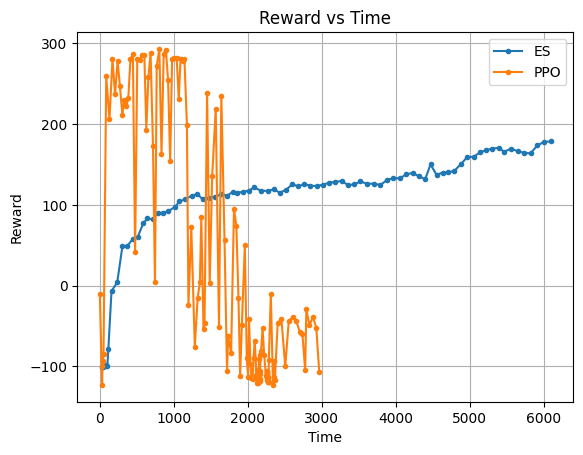

In [ ]:
def read_json_file(file_path):
    elements = []
    with open(file_path, 'r') as file:
        for line in file:
            elements.append(json.loads(line))
    return elements

def correct_json_file(file_path, switch_name=False):
    with open(file_path, 'r') as file:
        with open(file_path.replace('.json', '_mod.json'), 'w') as file2:
            n_s = file.read().replace('}{', '}\n{')
            if switch_name:
                n_s = n_s.replace('meanReward', 'best_reward')
            file2.write(n_s)

def plot_data(data, ppo):
    rewards = [item['best_reward'] for item in data]
    times = [item['time'] for item in data]

    if ppo:
      newTimes = [sum(times[:i]) for i in range(len(times))]
      newTimes = [newTimes[i*10] for i in range(len(times)//10) ] #da levare
      rewards = [rewards[i*10] for i in range(len(rewards)//10)] #da levare

    else:
      newTimes = times
    if ppo:
      plt.plot(newTimes, rewards, label='PPO',marker='o', markersize=3)
    else:
      plt.plot(times, rewards, label='ES',marker='o', markersize=3)
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.title('Reward vs Time')
    plt.grid(True)

if __name__ == "__main__":
    # ES
    file_path = '/content/drive/MyDrive/RL_FINAL/REWARDS_ES.json'  # Replace with your JSON file path
    correct_json_file(file_path)
    data = read_json_file(file_path.replace('.json', '_mod.json'))
    plot_data(data,False)

    # PPO
    file_path = '/content/drive/MyDrive/RL_FINAL/REWARDS_PPO.json'  # Replace with your JSON file path
    correct_json_file(file_path, switch_name=True)
    data = read_json_file(file_path.replace('.json', '_mod.json'))
    plot_data(data,True)



    plt.show()


# **Evaluation of the best models for both PPO and ES**
We evalute the best model saved at traning time of both PPO and ES making them play 100 runs of the environment, collectiong the rewards and making an histogram from them.

**ES evaluation:**

<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute
/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
<ipython-input-2-af583e842232>:29: FutureWarning: You are using `torch.l

tensor(168.4944, dtype=torch.float64)
tensor(174.4705, dtype=torch.float64)
tensor(170.6762, dtype=torch.float64)
tensor(168.5478, dtype=torch.float64)
tensor(29.3473, dtype=torch.float64)
tensor(152.4690, dtype=torch.float64)
tensor(-6.3712, dtype=torch.float64)
tensor(155.5073, dtype=torch.float64)
tensor(39.8451, dtype=torch.float64)
tensor(169.7537, dtype=torch.float64)
tensor(174.2904, dtype=torch.float64)
tensor(159.2121, dtype=torch.float64)
tensor(167.0807, dtype=torch.float64)
tensor(170.1436, dtype=torch.float64)
tensor(175.1947, dtype=torch.float64)
tensor(155.0016, dtype=torch.float64)
tensor(165.8686, dtype=torch.float64)
tensor(182.5226, dtype=torch.float64)
tensor(58.4683, dtype=torch.float64)
tensor(171.2548, dtype=torch.float64)
tensor(167.6595, dtype=torch.float64)
tensor(183.1998, dtype=torch.float64)
tensor(175.6044, dtype=torch.float64)
tensor(-66.6307, dtype=torch.float64)
tensor(4.5707, dtype=torch.float64)
tensor(9.7629, dtype=torch.float64)
tensor(14.8774, dtyp

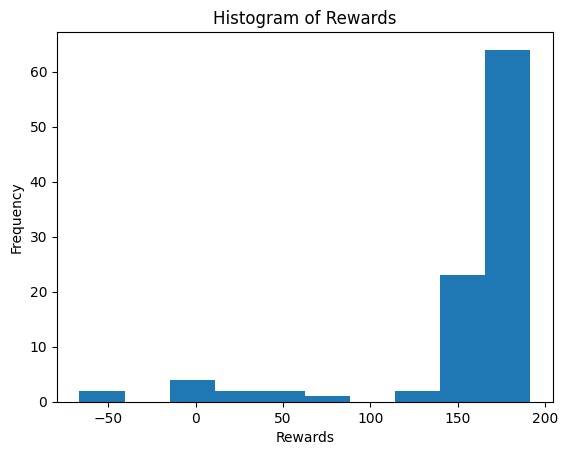

In [ ]:
env_name = "BipedalWalker-v3"
env = gym.make(env_name)#, render_mode="human")

class AgentNN(nn.Module): #its the Agent network in the ES, and the PolicyNetwork in the PPO
    def __init__(self, n_inputs, n_hidden, n_outputs):
        super(AgentNN, self).__init__()
        self.fc1 = nn.Linear(24, 512)
        self.fc2 = nn.Linear(512, 4)
        self.tanh = nn.Tanh()

    def loadFromTensors(self, W1, W2, b1, b2):
        self.fc1.weight = nn.Parameter(W1.T)
        self.fc2.weight = nn.Parameter(W2.T)
        self.fc1.bias = nn.Parameter(b1)
        self.fc2.bias = nn.Parameter(b2)

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        return x


params = torch.load('/content/drive/MyDrive/RL_FINAL/bestAgentES.pt')
params['fc1.weight'] = params['fc1.weight'].T
params['fc2.weight'] = params['fc2.weight'].T

params['fc1.bias'] = params['fc1.bias'].squeeze(0)
params['fc2.bias'] = params['fc2.bias'].squeeze(0)

rete = AgentNN(512, 24, 4)
rete.load_state_dict(params)
allRewards = []
for _ in range(100):
    done = False
    state = env.reset()
    rewardRun = 0
    while not done:
        with torch.no_grad():
            if type(state) == tuple:
                state = state[0]
            action = rete(torch.from_numpy(state))
            #print(action)
            state, reward, done, info = env.step(action)
            env.render()
            rewardRun+=reward
    allRewards.append(rewardRun)



import matplotlib.pyplot as plt

plt.hist(allRewards, bins=10)
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
plt.show()

**PPO evaluation:**

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Best = 0:   0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
Best = 300.9753021486336: 100%|██████████| 100/100 [30:17<00:00, 18.17s/it]


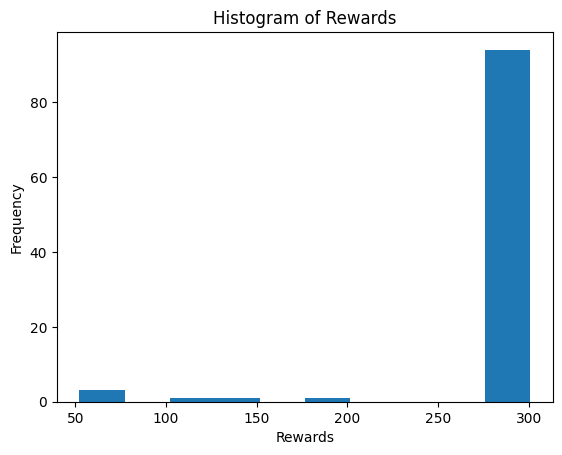

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

class A2C_policy(nn.Module):
    '''
    Policy neural network --- 15000 params ca.
    '''
    def __init__(self, input_shape, n_actions):
        super(A2C_policy, self).__init__()

        self.lp = nn.Sequential(
            nn.Linear(24, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU())

        self.mean_l = nn.Linear(32, 4)
        self.mean_l.weight.data.mul_(0.1)

        self.var_l = nn.Linear(32, 4)
        self.var_l.weight.data.mul_(0.1)

        self.logstd = nn.Parameter(torch.zeros(4))

    def forward(self, x):
        #x.to(device)
        ot_n = self.lp(x.float())
        return F.tanh(self.mean_l(ot_n))

params = torch.load('/content/drive/MyDrive/RL_FINAL/PPO_BipedalWalker-v3_19_17.58.14_0.0004_0.001_2049_64.pth.tar')
model = A2C_policy(24, 4)
p = params['agent_policy']
model.load_state_dict(p)


allRewards = []
pb = tqdm(range(100),desc='Best = 0')
best = 0
for _ in pb:
    done = False
    state = env.reset()
    rewardRun = 0
    while not done:
        with torch.no_grad():
            if type(state) == tuple:
                state = state[0]
            action = model(torch.from_numpy(state))
            #print(action)
            state, reward, done, info = env.step(action)
            env.render()
            rewardRun+=reward
    if rewardRun > best:
      best = rewardRun
      pb.set_description(f"Best = {best}")
    allRewards.append(rewardRun)



import matplotlib.pyplot as plt

plt.hist(allRewards, bins=10)
plt.xlabel('Rewards')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
plt.show()


In [ ]:
AA = """tensor(168.4944, dtype=torch.float64)
tensor(174.4705, dtype=torch.float64)
tensor(170.6762, dtype=torch.float64)
tensor(168.5478, dtype=torch.float64)
tensor(29.3473, dtype=torch.float64)
tensor(152.4690, dtype=torch.float64)
tensor(-6.3712, dtype=torch.float64)
tensor(155.5073, dtype=torch.float64)
tensor(39.8451, dtype=torch.float64)
tensor(169.7537, dtype=torch.float64)
tensor(174.2904, dtype=torch.float64)
tensor(159.2121, dtype=torch.float64)
tensor(167.0807, dtype=torch.float64)
tensor(170.1436, dtype=torch.float64)
tensor(175.1947, dtype=torch.float64)
tensor(155.0016, dtype=torch.float64)
tensor(165.8686, dtype=torch.float64)
tensor(182.5226, dtype=torch.float64)
tensor(58.4683, dtype=torch.float64)
tensor(171.2548, dtype=torch.float64)
tensor(167.6595, dtype=torch.float64)
tensor(183.1998, dtype=torch.float64)
tensor(175.6044, dtype=torch.float64)
tensor(-66.6307, dtype=torch.float64)
tensor(4.5707, dtype=torch.float64)
tensor(9.7629, dtype=torch.float64)
tensor(14.8774, dtype=torch.float64)
tensor(178.5641, dtype=torch.float64)
tensor(164.0327, dtype=torch.float64)
tensor(172.4286, dtype=torch.float64)
tensor(173.2396, dtype=torch.float64)
tensor(168.6727, dtype=torch.float64)
tensor(177.7282, dtype=torch.float64)
tensor(170.2322, dtype=torch.float64)
tensor(165.8026, dtype=torch.float64)
tensor(163.8398, dtype=torch.float64)
tensor(151.7612, dtype=torch.float64)
tensor(175.2715, dtype=torch.float64)
tensor(155.8773, dtype=torch.float64)
tensor(178.0819, dtype=torch.float64)
tensor(175.1009, dtype=torch.float64)
tensor(162.4514, dtype=torch.float64)
tensor(145.6388, dtype=torch.float64)
tensor(150.2511, dtype=torch.float64)
tensor(191.5824, dtype=torch.float64)
tensor(176.6041, dtype=torch.float64)
tensor(168.3005, dtype=torch.float64)
tensor(173.3253, dtype=torch.float64)
tensor(155.3034, dtype=torch.float64)
tensor(178.7094, dtype=torch.float64)
tensor(176.7905, dtype=torch.float64)
tensor(171.4890, dtype=torch.float64)
tensor(184.1265, dtype=torch.float64)
tensor(171.9371, dtype=torch.float64)
tensor(161.8261, dtype=torch.float64)
tensor(172.2756, dtype=torch.float64)
tensor(185.1991, dtype=torch.float64)
tensor(173.8236, dtype=torch.float64)
tensor(182.9622, dtype=torch.float64)
tensor(169.6227, dtype=torch.float64)
tensor(159.3957, dtype=torch.float64)
tensor(166.9707, dtype=torch.float64)
tensor(173.5970, dtype=torch.float64)
tensor(162.2747, dtype=torch.float64)
tensor(181.6252, dtype=torch.float64)
tensor(64.0744, dtype=torch.float64)
tensor(153.1474, dtype=torch.float64)
tensor(180.5389, dtype=torch.float64)
tensor(168.8595, dtype=torch.float64)
tensor(176.5475, dtype=torch.float64)
tensor(187.4745, dtype=torch.float64)
tensor(183.0278, dtype=torch.float64)
tensor(157.3349, dtype=torch.float64)
tensor(165.9357, dtype=torch.float64)
tensor(177.5467, dtype=torch.float64)
tensor(162.7910, dtype=torch.float64)
tensor(136.0380, dtype=torch.float64)
tensor(155.9858, dtype=torch.float64)
tensor(169.2793, dtype=torch.float64)
tensor(177.1600, dtype=torch.float64)
tensor(177.6989, dtype=torch.float64)
tensor(-48.1551, dtype=torch.float64)
tensor(164.2003, dtype=torch.float64)
tensor(147.8226, dtype=torch.float64)
tensor(158.1785, dtype=torch.float64)
tensor(168.6946, dtype=torch.float64)
tensor(178.1692, dtype=torch.float64)
tensor(-9.4766, dtype=torch.float64)
tensor(170.3453, dtype=torch.float64)
tensor(171.7352, dtype=torch.float64)
tensor(138.1476, dtype=torch.float64)
tensor(179.3841, dtype=torch.float64)
tensor(180.0012, dtype=torch.float64)
tensor(164.9437, dtype=torch.float64)
tensor(171.3150, dtype=torch.float64)
tensor(167.6132, dtype=torch.float64)
tensor(177.9575, dtype=torch.float64)
tensor(171.1185, dtype=torch.float64)
tensor(170.5532, dtype=torch.float64)
tensor(176.2306, dtype=torch.float64)"""

AA = AA.split('\n')
b =  max([float(i.split('(')[1].split(',')[0]) for i in AA])
b

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


191.5824